# IMPORTANDO AS BIBLIOTECAS

In [1]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais - CNN
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
# Plot - Biblioteca para uso de imagens e gráficos
import matplotlib.pyplot as plt
%matplotlib inline
# Avaliação - Matriz de Confusão
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Lendo o dataset de treinamento
train = pd.read_csv("train.csv")

In [3]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  

In [4]:
# Separando x_train e y_train para teste e treino
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())
# Em formato numpy array de imagens 28 x 28

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [5]:
print(X.shape) # tamanho da base

(42000, 784)


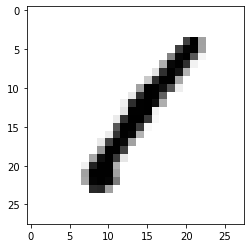

Label: 1


In [6]:
# Entendo melhor com plot
plt.imshow(X.values[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[0]))

In [7]:
# Transformando a imagem 2d em um numpy array (imagem 28*28)
x = X.values.reshape(42000, 28, 28, 1)

#Normalizando para valores entre 0 e 1, fazendo a divisão por 255
x = x.astype('float32')
x /= 255

In [8]:
# Ajustando o formato de saída
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# Ex: [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [38]:
# Na minha base, foram separados para treino 90% e 10% de validação
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=5)
print('Quantidade de treino: {}'.format(len(x_train)))
print('Quantidade de validação: {}'.format(len(x_val)))

Quantidade de treino: 37800
Quantidade de validação: 4200


# CRIANDO O MODELO DA REDE NEURAL CNN - SEQUENCIAL

In [10]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Conv2D: Camada com kernels (filtros) que percorrem a imagem extraindo caracterísitcas (mapas de caracteísticas)
# MaxPooling2D: Camada que reduz a dimensionalidade dos mapas de características 2D
# Flatten: Camada que transforma um mapa de características 2D num vetor para classficador final
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 40)        7240      
                                                                 
 flatten (Flatten)           (None, 4840)              0         
                                                                 
 dense (Dense)               (None, 50)                242050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                        

In [11]:
# Compilando o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [12]:
# Treinamento com as partes dos dados

# número de amostras de testes
batch_size = 32
# n° de épocas
epochs = 20

# #Salvar o melhor modelo, utilizando o h5 H5, que é um formato de arquivo para armazenar dados estruturados, 
# não é um modelo em si. Keras salva os modelos neste formato, pois pode armazenar facilmente os pesos 
# e a configuração do modelo em um único arquivo.
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
    filepath='model.h5',
    monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/20
1178/1182 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9380
Epoch 00001: val_loss improved from inf to 0.06327, saving model to model.h5
1182/1182 [==============================] - 18s 14ms/step - loss: 0.2012 - accuracy: 0.9381 - val_loss: 0.0633 - val_accuracy: 0.9807
Epoch 2/20
1178/1182 [============================>.] - ETA: 0s - loss: 0.0724 - accuracy: 0.9783
Epoch 00002: val_loss improved from 0.06327 to 0.05321, saving model to model.h5
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0532 - val_accuracy: 0.9845
Epoch 3/20
1180/1182 [============================>.] - ETA: 0s - loss: 0.0522 - accuracy: 0.9843
Epoch 00003: val_loss improved from 0.05321 to 0.04090, saving model to model.h5
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 4/20
1180/1182 [============================>.] - ETA: 0

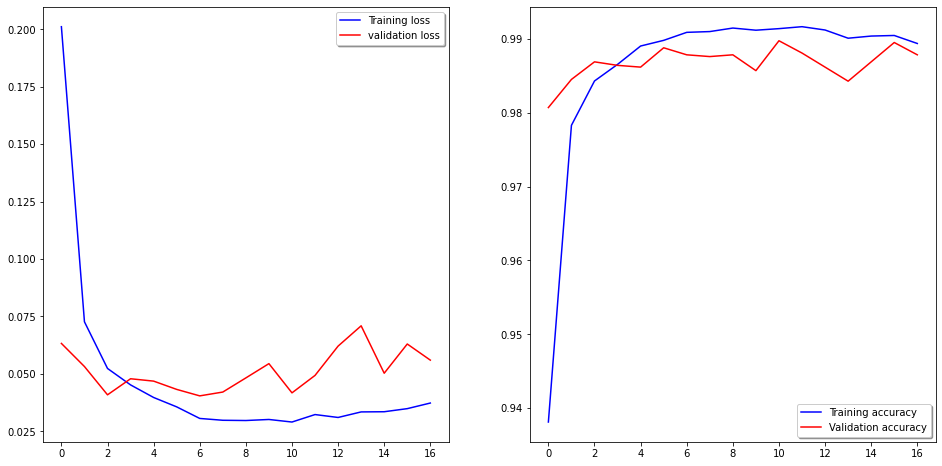

In [39]:
# Plotando o gráfico de perda e validação da Acurácia

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [40]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [41]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.040439724922180176
Test accuracy: 0.9878571629524231


In [42]:
# Testando uma entrada para valores quaisquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,28,28,1))))
print(model.predict(x_train[10].reshape((1,28,28,1))))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[3.0164454e-06 1.9166698e-07 5.1664653e-08 6.9653255e-12 9.9793458e-01
  1.1185035e-08 1.4003448e-03 5.9783972e-08 6.6138833e-04 4.3401675e-07]]
[[3.0164454e-06 1.9166698e-07 5.1664653e-08 6.9653255e-12 9.9793458e-01
  1.1185035e-08 1.4003448e-03 5.9783972e-08 6.6138833e-04 4.3401675e-07]]
